# Download the tweets from '2015-12-09' to '2016-01-23' with the words 'triplej', 'triplejhottest100', and/or 'hottest100'

In [2]:
import pickle, tqdm
from download_tweets import *
from tqdm import tqdm as progressbar

In [ ]:
keywords = ['triplej','triplejhottest100','hottest100']
tweets_2015 = []
for keyword in keywords:
    tweets = download_tweets('2015-12-09', '2016-01-23', keyword)
    tweets_2015.extend(tweets)
tweets_2015 = list(set(tweets_2015))
pickle.dump(tweets_2015, open( "tweets_2015.pickle", "wb"))

# Go through each tweet, and see if it has a twitterpic or instgram link.  If so, download it, and save it to a zip file.

In [ ]:
tweets_to_image_files(tweets_2015, 'tweets_2015.zip')

# Now OCR each image and look for 'Your votes' or 'Your hottest 100 votes'.  With the ones that do, try to interpret the image against the top 200 winners of 2015.

In [ ]:
ocr_votes_2015 = zip_to_texts('tweets_2015.zip')
pickle.dump(ocr_votes_2015, open( "ocr_votes_2015.pickle", "wb"))

In [49]:
ocr_votes_2015 = pickle.load(open( "ocr_votes_2015.pickle"))
top_200_winners_text = open('2015_winners.txt').readlines()
top_200_winners = [' '.join(x.split(' ')[1:]).strip() for x in top_200_winners_text]

votes_2015 = []
for ocr_result in progressbar(ocr_votes_2015):
    vote_list = isolate_images(ocr_result[1], top_200_winners)
    vote = {'user':ocr_result[0].split('~')[0],'filename':ocr_result[0],
            'text':ocr_result[1], 'votes': vote_list}
    votes_2015.append(vote)
pickle.dump(votes_2015, open( "votes_2015.pickle", "wb"))

100%|██████████| 2908/2908 [03:06<00:00, 15.56it/s]


# Filter for only the ones with an actual vote image, and assign them a score

In [59]:
votes_2015 = pickle.load(open( "votes_2015.pickle"))

filtered_votes_2015 = [v for v in votes_2015 if v['votes'] != False and v['votes'] != [] ]

for fv in filtered_votes_2015:
    harmonic_score, descending_score, flat_score = 0.0, 0.0, 0.0
    for vote in fv['votes']:
        harmonic_score   = harmonic_score + 1.0 / (top_200_winners.index(vote)+1.0)
        descending_score = descending_score + 201 - top_200_winners.index(vote)
    fv['harmonic_score']   = harmonic_score
    fv['descending_score'] = descending_score

filtered_votes_2015 = sorted (filtered_votes_2015, key = lambda fv: fv['harmonic_score'], reverse= True)


# Let's see how those scores stack up

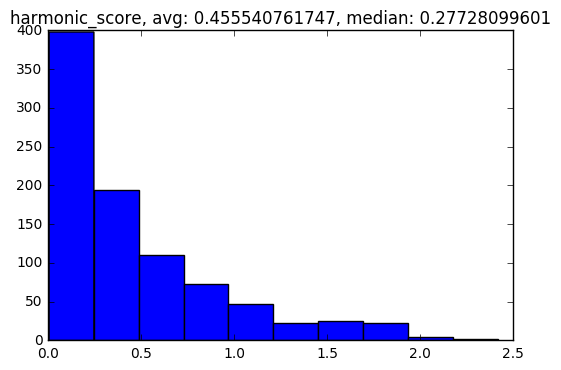

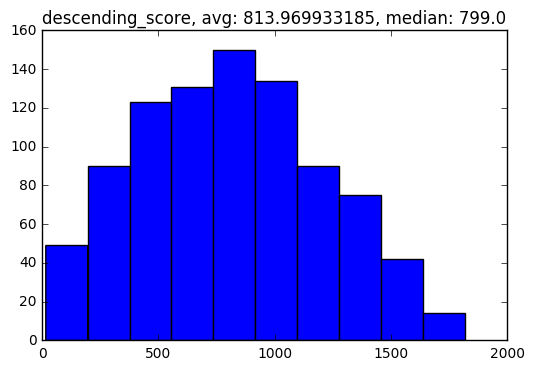

In [60]:
import matplotlib.pyplot as plt

for score_type in ('harmonic_score','descending_score'):
    scores = sorted([fv[score_type] for fv in filtered_votes_2015 if fv[score_type] != 0.0], reverse = True)
    avg = str(sum(scores) / len(scores))
    med = str(scores[len(scores)//2])
    plt.title(score_type + ', avg: ' + avg + ', median: ' + med)
    plt.hist(scores)
    plt.show()


# Now for 2016
## Download the tweets from '2016-12-09' to '2017-01-24' with the words 'triplej', 'triplejhottest100', and/or 'hottest100'

In [ ]:
keywords = ['triplej','triplejhottest100','hottest100']
tweets_2016 = []
for keyword in keywords:
    tweets = download_tweets('2016-12-09', '2017-01-24', keyword)
    tweets_2016.extend(tweets)
tweets_2016 = list(set(tweets_2016))
pickle.dump(tweets_2016, open( "tweets_2016.pickle", "wb"))

# Go through each tweet, and see if it has a twitterpic or instgram link. If so, download it, and save it to a zip file.

In [ ]:
tweets_to_image_files(tweets_2016, 'tweets_2016.zip')

# Now OCR each image and look for 'Your votes' or 'Your hottest 100 votes'.  With the ones that do, try to interpret the image against the shortlist for 2016.

In [45]:
ocr_votes_2016 = zip_to_texts('tweets_2016.zip')
pickle.dump(ocr_votes_2016, open( "ocr_votes_2016.pickle", "wb"))

2010it [1:05:55,  1.91s/it]


In [46]:
ocr_votes_2016 = pickle.load(open( "ocr_votes_2016.pickle"))
shortlist_2016 = open('2016_shortlist.txt').readlines()

votes_2016 = []
for ocr_result in progressbar(ocr_votes_2016):
    vote_list = isolate_images(ocr_result[1], shortlist_2016)
    vote = {'user':ocr_result[0].split('~')[0],'filename':ocr_result[0],
            'text':ocr_result[1], 'votes': vote_list}
    votes_2016.append(vote)
pickle.dump(votes_2016, open( "votes_2016.pickle", "wb"))

100%|██████████| 2010/2010 [22:00<00:00,  1.17it/s]


# Now the Moment of Truth -- Assign the weights to each song and print them out

In [90]:
votes_2016 = pickle.load(open( "votes_2016.pickle" ))
votes_2016 = [v for v in votes_2016 if v['votes'] is not False]

def weight_songs(score_type, default_score):
    songs_2016 = {}
    for v in progressbar(votes_2016):
        v_2015 = [v15 for v15 in filtered_votes_2015 if v15['user'] == v['user'] and score_type in v15.keys()]
        if v_2015:
            weighting = v_2015[0][score_type]
        else:
            weighting = default_score
        for vote in v['votes']:
            if vote not in songs_2016.keys():
                songs_2016[vote] = weighting
            else:
                songs_2016[vote] = songs_2016[vote] + weighting
    return songs_2016

In [91]:
default_score = sum([fv['descending_score'] for fv in filtered_votes_2015]) / len([fv['descending_score'] for fv in filtered_votes_2015])
songs = weight_songs('descending_score', default_score)
for i, song_weight in enumerate(sorted(songs, key=songs.get, reverse = True)[:200]):
    print i+1, song_weight.strip(), songs[song_weight]

100%|██████████| 789/789 [00:00<00:00, 4567.77it/s]


1 Flume Never Be Like You {Ft. Kai} 109378.662584
2 Amy Shark Adore 94065.1436526
3 Tash Sultana Jungle 79574.4743875
4 A.B. Original January 26 {Ft. Dan Sultan} 73272.6247216
5 Childish Gambino Redbone 72903.564588
6 Hilltop Hoods 1955 {Ft. Montaigne/Tom Thum} 59954.1057906
7 Illy Papercuts {Ft. Vera Blue} 52868.4064588
8 xx, The On Hold 48233.6169265
9 Montaigne Because I Love You 45622.6469933
10 Weeknd, The Starboy {Ft. Daft Punk} 45305.5267261
11 Catfish And The Bottlemen 7 44873.6770601
12 Flume Say It {Ft. Tove Lo} 44829.6169265
13 Peking Duk Stranger {Ft. Elliphant} 42957.5868597
14 DMA's Believe {triple j Like A Version 2016} 42559.5567929
15 Violent Soho Viceroy 42167.8273942
16 Kanye West Ultralight Beam 38979.7071269
17 Gretta Ray Drive 36415.7672606
18 Big Scary The Opposite Of Us 35740.0378619
19 Client Liaison World Of Our Love 34795.9476615
20 Alex Lahey You Don't Think You Like People Like Me 33695.0979955
21 Chance The Rapper All Night {Ft. Knox Fortune} 33516.9476615

In [92]:
default_score = sum([fv['harmonic_score'] for fv in filtered_votes_2015]) / len([fv['harmonic_score'] for fv in filtered_votes_2015])
songs = weight_songs('harmonic_score', default_score)
for i, song_weight in enumerate(sorted(songs, key=songs.get, reverse = True)):
    print i+1, song_weight.strip(), songs[song_weight]

100%|██████████| 789/789 [00:00<00:00, 4129.46it/s]


1 Flume Never Be Like You {Ft. Kai} 62.887668182
2 Amy Shark Adore 53.9898721825
3 Tash Sultana Jungle 49.3826489795
4 A.B. Original January 26 {Ft. Dan Sultan} 42.914820995
5 Childish Gambino Redbone 41.1732870402
6 Hilltop Hoods 1955 {Ft. Montaigne/Tom Thum} 36.114555671
7 Illy Papercuts {Ft. Vera Blue} 31.4042167084
8 Montaigne Because I Love You 26.6085245659
9 Catfish And The Bottlemen 7 25.8579476156
10 Weeknd, The Starboy {Ft. Daft Punk} 25.7553272064
11 xx, The On Hold 25.3245523815
12 Flume Say It {Ft. Tove Lo} 24.9311937125
13 DMA's Believe {triple j Like A Version 2016} 24.5455891943
14 Violent Soho Viceroy 24.2984788927
15 Peking Duk Stranger {Ft. Elliphant} 24.2258723017
16 Kanye West Ultralight Beam 23.5982056699
17 Big Scary The Opposite Of Us 21.137378029
18 Client Liaison World Of Our Love 20.5830592352
19 Gretta Ray Drive 20.0986723766
20 Alex Lahey You Don't Think You Like People Like Me 19.7365722094
21 Avalanches, The Frankie Sinatra 19.4911309714
22 Chance The Rap

In [93]:
default_score = 1
songs = weight_songs('flat_score', default_score)
for i, song_weight in enumerate(sorted(songs, key=songs.get, reverse = True)):
    print i+1, song_weight.strip(), songs[song_weight]

100%|██████████| 789/789 [00:00<00:00, 4189.39it/s]


1 Flume Never Be Like You {Ft. Kai} 128
2 Amy Shark Adore 111
3 Tash Sultana Jungle 95
4 A.B. Original January 26 {Ft. Dan Sultan} 90
5 Childish Gambino Redbone 89
6 Hilltop Hoods 1955 {Ft. Montaigne/Tom Thum} 71
7 Illy Papercuts {Ft. Vera Blue} 61
8 xx, The On Hold 57
9 Montaigne Because I Love You 54
10 Weeknd, The Starboy {Ft. Daft Punk} 53
11 Catfish And The Bottlemen 7 53
12 Flume Say It {Ft. Tove Lo} 53
13 Peking Duk Stranger {Ft. Elliphant} 51
14 DMA's Believe {triple j Like A Version 2016} 51
15 Violent Soho Viceroy 49
16 Kanye West Ultralight Beam 47
17 Gretta Ray Drive 44
18 Big Scary The Opposite Of Us 41
19 Client Liaison World Of Our Love 40
20 Chance The Rapper All Night {Ft. Knox Fortune} 39
21 Alex Lahey You Don't Think You Like People Like Me 39
22 Cub Sport Come On Mess Me Up 37
23 Blink-182 Bored To Death 36
24 Avalanches, The Frankie Sinatra 36
25 Miike Snow Genghis Khan 35
26 Milky Chance Cocoon 34
27 Mura Masa Love$ick {Ft. A$AP Rocky} 33
28 Smith Street Band, The